## LOAN DEFAULT PREDICTION MODEL FOR DIGITAL LENDERS

# Data Preprocessing


Importing libraries

In [1]:
# Importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

# There are 3 datasets that I'll be making use of for this project 
1. traindemographics.csv - Customers demographics 
2. trainperf.csv - Customers performance data
3. trainprevloans.csv - customers previous loan data 

## Understanding the datasets

1. Customers Demographics 

In [2]:
df = pd.read_csv('traindemographics.csv')

In [3]:
df.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [4]:
df.tail()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
4341,8a858f155554552501555588ca2b3b40,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,NaN,Permanent,Graduate
4342,8a858fc65cf978f4015cf97cee3a02ce,1982-07-01 00:00:00.000000,Savings,7.013750,4.875662,GT Bank,NaN,NaN,NaN
4343,8a858f4f5b66de3a015b66fc83c61902,1989-09-26 00:00:00.000000,Savings,6.295530,7.092508,GT Bank,NaN,Permanent,NaN
4344,8aaae7a74400b28201441c8b62514150,1985-09-06 00:00:00.000000,Savings,3.354206,6.539070,GT Bank,HEAD OFFICE,Permanent,Primary
4345,8a85896653e2e18b0153e69c1b90265c,1975-06-05 00:00:00.000000,Savings,6.661014,7.472700,UBA,NaN,Permanent,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4346 non-null   object 
 1   birthdate                   4346 non-null   object 
 2   bank_account_type           4346 non-null   object 
 3   longitude_gps               4346 non-null   float64
 4   latitude_gps                4346 non-null   float64
 5   bank_name_clients           4346 non-null   object 
 6   bank_branch_clients         51 non-null     object 
 7   employment_status_clients   3698 non-null   object 
 8   level_of_education_clients  587 non-null    object 
dtypes: float64(2), object(7)
memory usage: 305.7+ KB


2. Customers Performance Data

In [6]:
df1 = pd.read_csv('trainperf.csv')

In [7]:
df1.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [8]:
df1.tail()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
4363,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30 09:19:42.000000,2017-07-30 08:18:30.000000,10000.0,13000.0,30,NaN,Bad
4364,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27 15:35:47.000000,2017-07-27 14:35:40.000000,10000.0,13000.0,30,NaN,Bad
4365,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25 16:25:57.000000,2017-07-25 15:24:47.000000,10000.0,11500.0,15,NaN,Bad
4366,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14 13:50:27.000000,2017-07-14 12:50:21.000000,10000.0,13000.0,30,8a858eda5c8863ff015c9dead65807bb,Bad
4367,8a858fd458639fcc015868eb14b542ad,301967124,8,2017-07-06 21:01:06.000000,2017-07-06 20:01:01.000000,30000.0,34500.0,30,NaN,Bad


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB


3. Customers Previous Loan Data

In [10]:
df2 = pd.read_csv('trainprevloans.csv')

In [11]:
df2.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [12]:
df2.tail()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
18178,8a858899538ddb8e0153a2b555421fc5,301611754,2,2016-04-16 13:36:34.000000,2016-04-16 12:36:28.000000,10000.0,13000.0,30,2016-05-14 00:04:52.000000,NaN,2016-05-16 00:00:00.000000,2016-05-13 18:05:07.000000
18179,8a858899538ddb8e0153a2b555421fc5,301761267,9,2016-11-18 14:26:07.000000,2016-11-18 13:25:51.000000,30000.0,34400.0,30,2016-12-13 16:08:57.000000,NaN,2016-12-19 00:00:00.000000,2016-12-13 15:53:48.000000
18180,8a858899538ddb8e0153a2b555421fc5,301631653,4,2016-06-12 15:30:56.000000,2016-06-12 14:30:50.000000,10000.0,13000.0,30,2016-07-09 15:39:00.000000,NaN,2016-07-12 00:00:00.000000,2016-07-09 15:23:56.000000
18181,8a858f0656b7820c0156c92ca3ba436f,301697691,1,2016-08-27 20:03:45.000000,2016-08-27 19:03:34.000000,10000.0,13000.0,30,2016-10-15 10:17:54.000000,NaN,2016-09-26 00:00:00.000000,2016-10-15 10:02:45.000000
18182,8a858faf5679a838015688de3028143d,301715255,2,2016-09-14 23:42:14.000000,2016-09-14 22:42:05.000000,10000.0,13000.0,30,2016-09-29 19:51:04.000000,NaN,2016-10-14 00:00:00.000000,2016-09-29 19:35:55.000000


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       18183 non-null  object 
 1   systemloanid     18183 non-null  int64  
 2   loannumber       18183 non-null  int64  
 3   approveddate     18183 non-null  object 
 4   creationdate     18183 non-null  object 
 5   loanamount       18183 non-null  float64
 6   totaldue         18183 non-null  float64
 7   termdays         18183 non-null  int64  
 8   closeddate       18183 non-null  object 
 9   referredby       1026 non-null   object 
 10  firstduedate     18183 non-null  object 
 11  firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


Merging customers demographics with customers performance data

In [14]:
customer = pd.merge(df1,df, on='customerid', how= 'left')

In [15]:
customer.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good,1985-08-23 00:00:00.000000,Savings,3.885298,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good,1984-09-18 00:00:00.000000,Other,11.139350,10.292041,EcoBank,NaN,Permanent,NaN
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good,1977-10-10 00:00:00.000000,Savings,3.985770,7.491708,First Bank,NaN,Permanent,NaN
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good,1986-09-07 00:00:00.000000,Other,7.457913,9.076574,GT Bank,NaN,Permanent,Primary


In [16]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4376 entries, 0 to 4375
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4376 non-null   object 
 1   systemloanid                4376 non-null   int64  
 2   loannumber                  4376 non-null   int64  
 3   approveddate                4376 non-null   object 
 4   creationdate                4376 non-null   object 
 5   loanamount                  4376 non-null   float64
 6   totaldue                    4376 non-null   float64
 7   termdays                    4376 non-null   int64  
 8   referredby                  589 non-null    object 
 9   good_bad_flag               4376 non-null   object 
 10  birthdate                   3277 non-null   object 
 11  bank_account_type           3277 non-null   object 
 12  longitude_gps               3277 non-null   float64
 13  latitude_gps                3277 

In [17]:
# A stastistical summary of the numerical attributes
customer.describe()

,systemloanid,loannumber,loanamount,totaldue,termdays,longitude_gps,latitude_gps
count,4.376000e+03,4376.000000,4376.000000,4376.000000,4376.000000,3277.000000,3277.000000
mean,3.019810e+08,5.169333,17803.930530,21252.565288,29.266453,4.534611,7.292799
std,1.342393e+04,3.652679,10749.041391,11943.706857,11.513424,7.916626,3.268758
min,3.019585e+08,2.000000,10000.000000,10000.000000,15.000000,-118.247009,-33.868818
25%,3.019691e+08,2.000000,10000.000000,13000.000000,30.000000,3.354984,6.473645
50%,3.019801e+08,4.000000,10000.000000,13000.000000,30.000000,3.587546,6.625954
75%,3.019935e+08,7.000000,20000.000000,24500.000000,30.000000,6.478157,7.429882
max,3.020040e+08,27.000000,60000.000000,68100.000000,90.000000,151.209290,71.228069


In [18]:
# Statistical summary of the categorical attributes
customer.describe(include=[object]) 

,customerid,approveddate,creationdate,referredby,good_bad_flag,birthdate,bank_account_type,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
count,4376,4376,4376,589,4376,3277,3277,3277,33,2784,443
unique,4368,4362,4364,521,2,2638,3,18,31,6,4
top,8a858f1e5cc4bc81015cc548e1eb5206,2017-07-01 21:13:24.000000,2017-07-05 13:48:26.000000,8a858fc55b2548dd015b286e452c678c,Good,1984-12-22 00:00:00.000000,Savings,GT Bank,OGBA,Permanent,Graduate
freq,2,2,2,8,3423,4,2578,1210,3,2348,321


<AxesSubplot:>

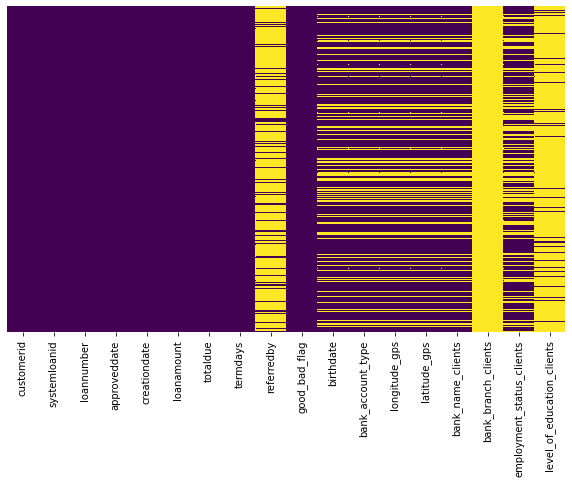

In [19]:
# To visiualize our missing data
plt.figure(figsize=(10,6))
sns.heatmap(customer.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [20]:
# investigating columns with missing values 
customer.isnull().sum() 

customerid                       0
systemloanid                     0
loannumber                       0
approveddate                     0
creationdate                     0
loanamount                       0
totaldue                         0
termdays                         0
referredby                    3787
good_bad_flag                    0
birthdate                     1099
bank_account_type             1099
longitude_gps                 1099
latitude_gps                  1099
bank_name_clients             1099
bank_branch_clients           4343
employment_status_clients     1592
level_of_education_clients    3933
dtype: int64

# Eliminating null values 


In [21]:
# checking column names
customer.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby',
       'good_bad_flag', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients'],
      dtype='object')

In [22]:
# Customers birth date 
customer[['birthdate']] 

,birthdate
0,1972-01-15 00:00:00.000000
1,1985-08-23 00:00:00.000000
2,1984-09-18 00:00:00.000000
3,1977-10-10 00:00:00.000000
4,1986-09-07 00:00:00.000000
...,...
4371,NaN
4372,1989-12-04 00:00:00.000000
4373,1989-11-21 00:00:00.000000
4374,1990-06-11 00:00:00.000000


In [23]:
# changing the date formats for columns with date
customer['approveddate'] = pd.to_datetime(customer['approveddate'])
customer['creationdate'] = pd.to_datetime(customer['creationdate'])
customer['birthdate'] = pd.to_datetime(customer['birthdate']) 

In [24]:
# getting customers age from their year of birth 
# calculating the age of customers as at the loan aprroved year 2017 from the current age from birthdate
loan_approved_year = 2017
customer["birthdate"] = loan_approved_year - customer["birthdate"].dt.year

In [25]:
# renaming birthdate to age 
customer.rename(columns = {'birthdate':'Age'}, inplace=True)

In [26]:
customer.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,Age,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,Good,45.0,Other,3.432010,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,Good,32.0,Savings,3.885298,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,Good,33.0,Other,11.139350,10.292041,EcoBank,NaN,Permanent,NaN
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,Good,40.0,Savings,3.985770,7.491708,First Bank,NaN,Permanent,NaN
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,Good,31.0,Other,7.457913,9.076574,GT Bank,NaN,Permanent,Primary


In [27]:
customer.Age.isnull().sum()

1099

In [28]:
# Replacing the missing values with the average age of customers
customer['Age'].fillna(customer['Age'].mean(), inplace=True)

In [29]:
customer.Age.isnull().sum()

0

In [30]:
customer.Age = customer.Age.round(0)

In [31]:
# Customers employment status
customer['employment_status_clients'].value_counts(dropna=False) 

Permanent        2348
NaN              1592
Self-Employed     277
Student           111
Unemployed         43
Retired             4
Contract            1
Name: employment_status_clients, dtype: int64

In [32]:
# check for proportion of numbers
customer.employment_status_clients.value_counts(dropna=False,normalize=True)

Permanent        0.536563
NaN              0.363803
Self-Employed    0.063300
Student          0.025366
Unemployed       0.009826
Retired          0.000914
Contract         0.000229
Name: employment_status_clients, dtype: float64

36% of the employment status of clients is missing

In [33]:
# Replacing null values with undefined instead of the mode
customer['employment_status_clients'].fillna(value='Undefined',inplace=True)

In [34]:
customer.employment_status_clients.isnull().sum()

0

In [35]:
# Customers level of education 
customer['level_of_education_clients'].value_counts(dropna=False)

NaN              3933
Graduate          321
Secondary          65
Post-Graduate      50
Primary             7
Name: level_of_education_clients, dtype: int64

In [36]:
# check for proportion of numbers
customer.level_of_education_clients.value_counts(dropna=False,normalize=True)

NaN              0.898766
Graduate         0.073355
Secondary        0.014854
Post-Graduate    0.011426
Primary          0.001600
Name: level_of_education_clients, dtype: float64

About 90% of customers level of education is missing

In [37]:
# Replacing missing values with undefined instead of mode
customer['level_of_education_clients'].fillna(value='Undefined',inplace=True)

In [38]:
customer.level_of_education_clients.isnull().sum()

0

In [39]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4376 entries, 0 to 4375
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  4376 non-null   object        
 1   systemloanid                4376 non-null   int64         
 2   loannumber                  4376 non-null   int64         
 3   approveddate                4376 non-null   datetime64[ns]
 4   creationdate                4376 non-null   datetime64[ns]
 5   loanamount                  4376 non-null   float64       
 6   totaldue                    4376 non-null   float64       
 7   termdays                    4376 non-null   int64         
 8   referredby                  589 non-null    object        
 9   good_bad_flag               4376 non-null   object        
 10  Age                         4376 non-null   float64       
 11  bank_account_type           3277 non-null   object      

Removing redundant variables 

In [40]:
# Drop unwanted columns 
customer.drop(['referredby','bank_account_type','longitude_gps','latitude_gps','bank_name_clients','bank_branch_clients'], axis=1,inplace=True)

In [41]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4376 entries, 0 to 4375
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  4376 non-null   object        
 1   systemloanid                4376 non-null   int64         
 2   loannumber                  4376 non-null   int64         
 3   approveddate                4376 non-null   datetime64[ns]
 4   creationdate                4376 non-null   datetime64[ns]
 5   loanamount                  4376 non-null   float64       
 6   totaldue                    4376 non-null   float64       
 7   termdays                    4376 non-null   int64         
 8   good_bad_flag               4376 non-null   object        
 9   Age                         4376 non-null   float64       
 10  employment_status_clients   4376 non-null   object        
 11  level_of_education_clients  4376 non-null   object      

Converting targert varaible to binary

In [42]:
customer[['good_bad_flag']].head()

,good_bad_flag
0,Good
1,Good
2,Good
3,Good
4,Good


In [43]:
# check for proportion of numbers
customer.good_bad_flag.value_counts(dropna=False,normalize=True)

Good    0.782221
Bad     0.217779
Name: good_bad_flag, dtype: float64

In [44]:
# to get a better understanding of the variable 
loan = customer.good_bad_flag.value_counts().to_frame()
loan["percent"] = (loan.apply(lambda x: x/x.sum()*100).round(2))
display(loan)

,good_bad_flag,percent
Good,3423,78.22
Bad,953,21.78


In [45]:
# Importing label encoder for conversion of categorical variable 
from sklearn.preprocessing import LabelEncoder

In [46]:
# creating an instance
labelencoder = LabelEncoder()

In [47]:
# Encoding by changing categorical value to binary
customer['good_bad_flag']= labelencoder.fit_transform(customer['good_bad_flag'])

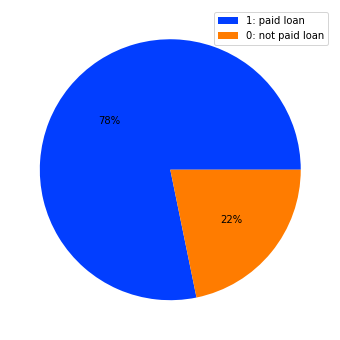

In [48]:
# visualising targer variable by using a pie chart
plt.figure(figsize=(10,6))
palette_color = sns.color_palette('bright')
plt.pie(customer['good_bad_flag'].value_counts(),colors= palette_color, autopct='%.0f%%') 
plt.legend(["1: paid loan","0: not paid loan"]) 

1 : Customers that paid their loan
    
0 : Customers that are yet to pay their loan
    
78% of customers settled their loan on time while 22% of the customers defaulted

<AxesSubplot:xlabel='good_bad_flag', ylabel='count'>

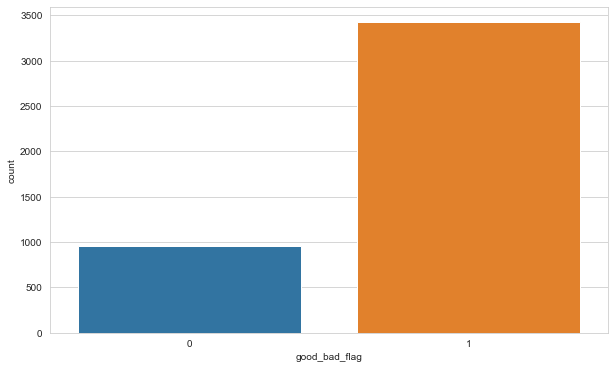

In [49]:
# visualising the target variable 

plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(data = customer, x= 'good_bad_flag')

<AxesSubplot:xlabel='good_bad_flag', ylabel='count'>

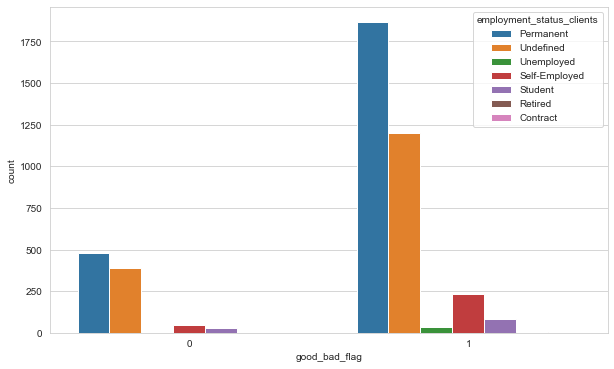

In [50]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(data = customer, x= 'good_bad_flag', hue='employment_status_clients')

<AxesSubplot:xlabel='good_bad_flag', ylabel='count'>

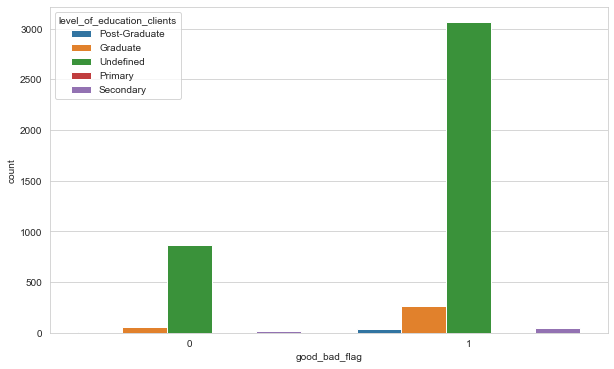

In [51]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(data = customer, x= 'good_bad_flag', hue='level_of_education_clients')

In [52]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4376 entries, 0 to 4375
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  4376 non-null   object        
 1   systemloanid                4376 non-null   int64         
 2   loannumber                  4376 non-null   int64         
 3   approveddate                4376 non-null   datetime64[ns]
 4   creationdate                4376 non-null   datetime64[ns]
 5   loanamount                  4376 non-null   float64       
 6   totaldue                    4376 non-null   float64       
 7   termdays                    4376 non-null   int64         
 8   good_bad_flag               4376 non-null   int64         
 9   Age                         4376 non-null   float64       
 10  employment_status_clients   4376 non-null   object        
 11  level_of_education_clients  4376 non-null   object      

# Creating extra features by creating columns and merging customers previous loan to the data frame


In [53]:
# function calculating loan interest
def loan_interest(loanamount,totaldue):
    loan_interest = ((totaldue - loanamount)/loanamount) * 100
    return loan_interest 

In [54]:
# creating a new column for loan interest rate
customer['loan_interest'] = customer.apply(lambda x: loan_interest(x["loanamount"], x["totaldue"]),axis=1)

In [55]:
customer.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,Age,employment_status_clients,level_of_education_clients,loan_interest
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,1,45.0,Permanent,Post-Graduate,15.00
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,1,32.0,Permanent,Graduate,15.00
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,1,33.0,Permanent,Undefined,11.25
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,1,40.0,Permanent,Undefined,15.00
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,1,31.0,Permanent,Primary,10.00


Customers previous loan

In [56]:
# investigating the customers loan history
df2.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       18183 non-null  object 
 1   systemloanid     18183 non-null  int64  
 2   loannumber       18183 non-null  int64  
 3   approveddate     18183 non-null  object 
 4   creationdate     18183 non-null  object 
 5   loanamount       18183 non-null  float64
 6   totaldue         18183 non-null  float64
 7   termdays         18183 non-null  int64  
 8   closeddate       18183 non-null  object 
 9   referredby       1026 non-null   object 
 10  firstduedate     18183 non-null  object 
 11  firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


grouping the customer previous loan by customerid and summarising with aggregate functions
to get customers loan history i.e number of loan collected, total amount collected, min amount and maximum loan collected by each customer

In [58]:
customer_prev_loan = df2.groupby('customerid')['loanamount'].agg(['count','sum','min', 'max'])

In [59]:
customer_prev_loan

,count,sum,min,max
customerid,,,,
8a1088a0484472eb01484669e3ce4e0b,1,10000.0,10000.0,10000.0
8a1a1e7e4f707f8b014f797718316cad,4,70000.0,10000.0,30000.0
8a1a32fc49b632520149c3b8fdf85139,7,90000.0,10000.0,20000.0
8a1eb5ba49a682300149c3c068b806c7,8,130000.0,10000.0,30000.0
8a1edbf14734127f0147356fdb1b1eb2,2,20000.0,10000.0,10000.0
...,...,...,...,...
8a858fff5a28d297015a33bc2e845305,6,100000.0,10000.0,30000.0
8a858fff5a36fe68015a37f8550a02a2,6,90000.0,10000.0,20000.0
8a858fff5a36fe68015a3ac5851618ab,1,10000.0,10000.0,10000.0


In [60]:
# merging the dataframe with customers loan history
customer = customer.merge(right = customer_prev_loan, on='customerid', how='left')

In [61]:
customer.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,Age,employment_status_clients,level_of_education_clients,loan_interest,count,sum,min,max
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,1,45.0,Permanent,Post-Graduate,15.00,11.0,200000.0,10000.0,30000.0
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,1,32.0,Permanent,Graduate,15.00,NaN,NaN,NaN,NaN
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,1,33.0,Permanent,Undefined,11.25,6.0,60000.0,10000.0,10000.0
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,1,40.0,Permanent,Undefined,15.00,2.0,20000.0,10000.0,10000.0
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,1,31.0,Permanent,Primary,10.00,8.0,150000.0,10000.0,30000.0


In [62]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4376 entries, 0 to 4375
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  4376 non-null   object        
 1   systemloanid                4376 non-null   int64         
 2   loannumber                  4376 non-null   int64         
 3   approveddate                4376 non-null   datetime64[ns]
 4   creationdate                4376 non-null   datetime64[ns]
 5   loanamount                  4376 non-null   float64       
 6   totaldue                    4376 non-null   float64       
 7   termdays                    4376 non-null   int64         
 8   good_bad_flag               4376 non-null   int64         
 9   Age                         4376 non-null   float64       
 10  employment_status_clients   4376 non-null   object        
 11  level_of_education_clients  4376 non-null   object      

In [63]:
# replacing null values for customers who don't have a loan history

customer['count'].fillna(0, inplace =True)
customer['sum'].fillna(0, inplace =True)
customer['min'].fillna(0, inplace =True)
customer['max'].fillna(0, inplace =True) 

In [64]:
# renaming the columns
customer.rename(columns = {'count':'loan_received'}, inplace=True)
customer.rename(columns = {'sum':'amount_received'}, inplace=True)
customer.rename(columns = {'min':'min_amount_received'}, inplace=True)
customer.rename(columns = {'max':'max_amount_received'}, inplace=True)

In [65]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4376 entries, 0 to 4375
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  4376 non-null   object        
 1   systemloanid                4376 non-null   int64         
 2   loannumber                  4376 non-null   int64         
 3   approveddate                4376 non-null   datetime64[ns]
 4   creationdate                4376 non-null   datetime64[ns]
 5   loanamount                  4376 non-null   float64       
 6   totaldue                    4376 non-null   float64       
 7   termdays                    4376 non-null   int64         
 8   good_bad_flag               4376 non-null   int64         
 9   Age                         4376 non-null   float64       
 10  employment_status_clients   4376 non-null   object        
 11  level_of_education_clients  4376 non-null   object      

# Exploratory Data Analysis

Investigating relationship among variables

In [66]:
customer.shape

(4376, 17)

Visualising numerical distribution 

In [67]:
customer.describe()

,systemloanid,loannumber,loanamount,totaldue,termdays,good_bad_flag,Age,loan_interest,loan_received,amount_received,min_amount_received,max_amount_received
count,4.376000e+03,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000
mean,3.019810e+08,5.169333,17803.930530,21252.565288,29.266453,0.782221,32.937614,21.781784,4.159735,68629.341865,9863.345521,16861.288848
std,1.342393e+04,3.652679,10749.041391,11943.706857,11.513424,0.412783,5.303109,7.704275,3.655050,88896.779685,1058.978551,10340.100053
min,3.019585e+08,2.000000,10000.000000,10000.000000,15.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.019691e+08,2.000000,10000.000000,13000.000000,30.000000,1.000000,30.000000,15.000000,1.000000,10000.000000,10000.000000,10000.000000
50%,3.019801e+08,4.000000,10000.000000,13000.000000,30.000000,1.000000,33.000000,22.500000,3.000000,30000.000000,10000.000000,10000.000000
75%,3.019935e+08,7.000000,20000.000000,24500.000000,30.000000,1.000000,35.000000,30.000000,6.000000,90000.000000,10000.000000,20000.000000
max,3.020040e+08,27.000000,60000.000000,68100.000000,90.000000,1.000000,56.000000,30.000000,26.000000,770000.000000,30000.000000,60000.000000


array([[<AxesSubplot:title={'center':'systemloanid'}>,
        <AxesSubplot:title={'center':'loannumber'}>,
        <AxesSubplot:title={'center':'approveddate'}>,
        <AxesSubplot:title={'center':'creationdate'}>],
       [<AxesSubplot:title={'center':'loanamount'}>,
        <AxesSubplot:title={'center':'totaldue'}>,
        <AxesSubplot:title={'center':'termdays'}>,
        <AxesSubplot:title={'center':'good_bad_flag'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'loan_interest'}>,
        <AxesSubplot:title={'center':'loan_received'}>,
        <AxesSubplot:title={'center':'amount_received'}>],
       [<AxesSubplot:title={'center':'min_amount_received'}>,
        <AxesSubplot:title={'center':'max_amount_received'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

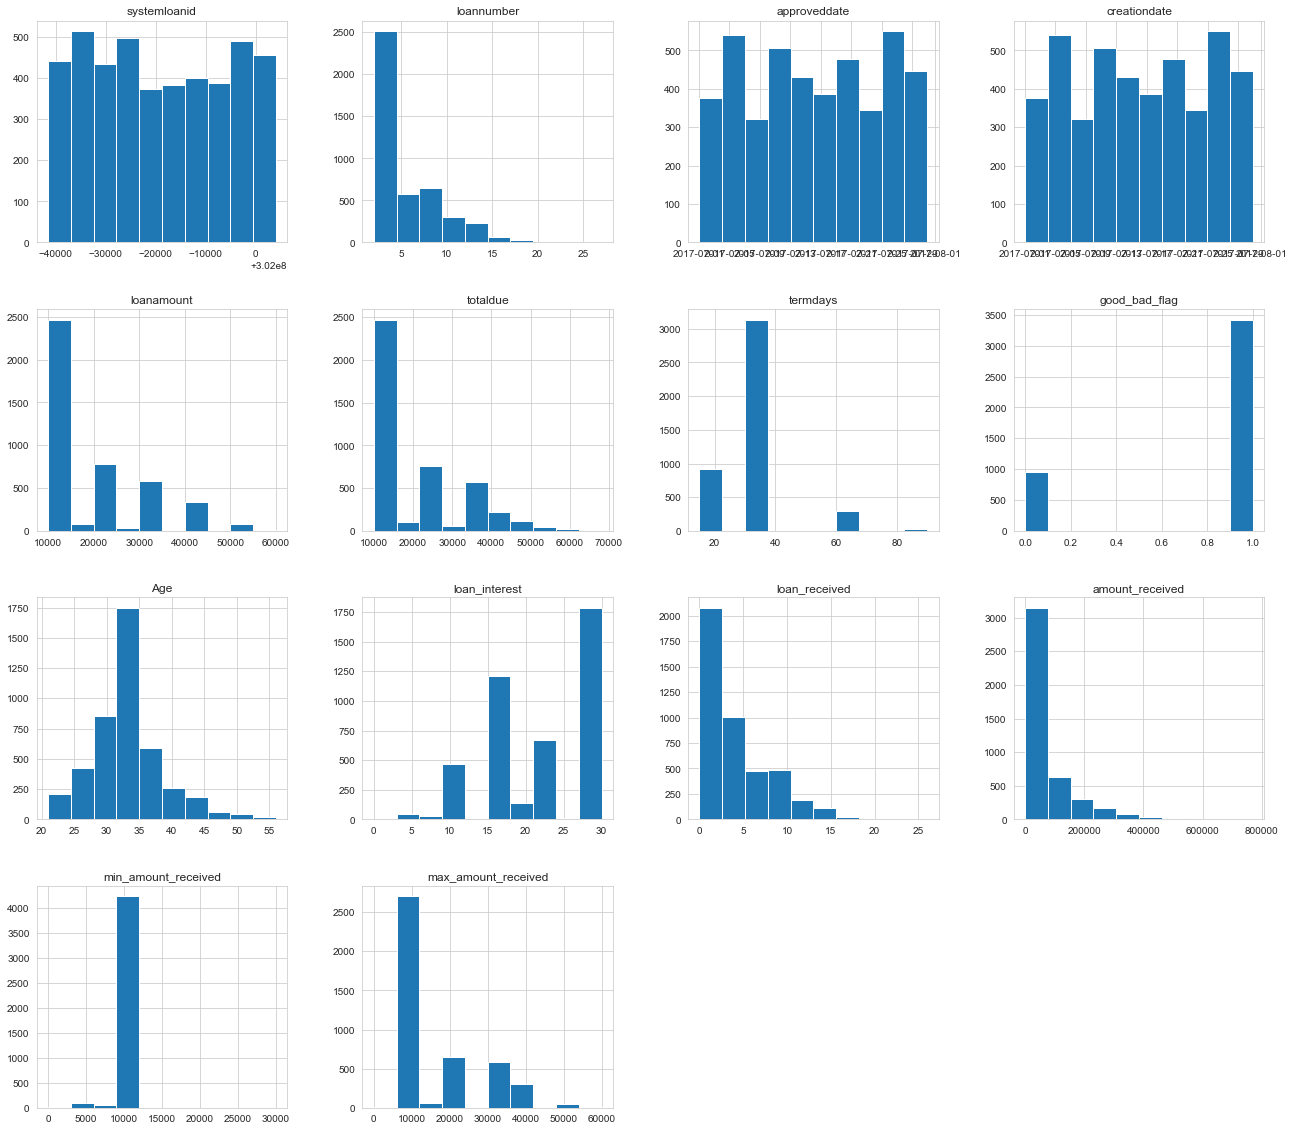

In [68]:
customer.hist(figsize=(22,20))

Visualising categorical distribution

In [69]:
customer.describe(include='object')

,customerid,employment_status_clients,level_of_education_clients
count,4376,4376,4376
unique,4368,7,5
top,8a858f1e5cc4bc81015cc548e1eb5206,Permanent,Undefined
freq,2,2348,3933


<AxesSubplot:xlabel='employment_status_clients', ylabel='count'>

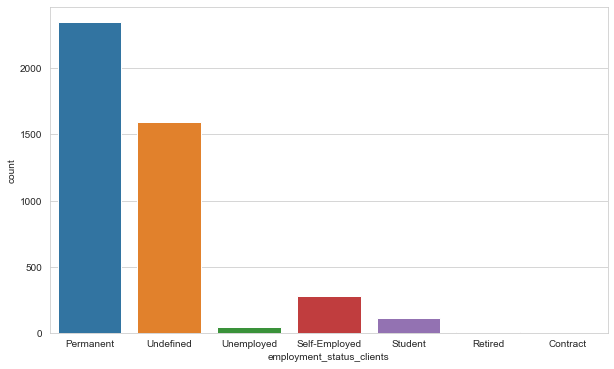

In [70]:
# Customer employment status 

plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(data = customer, x= 'employment_status_clients')

<AxesSubplot:xlabel='level_of_education_clients', ylabel='count'>

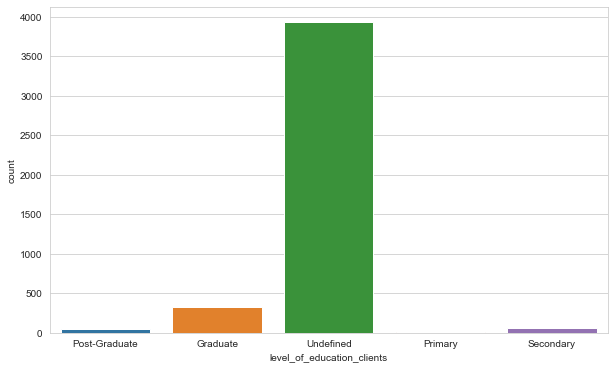

In [71]:
# Customer level of education 

plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(data = customer, x= 'level_of_education_clients')

Investigating relationship between variables

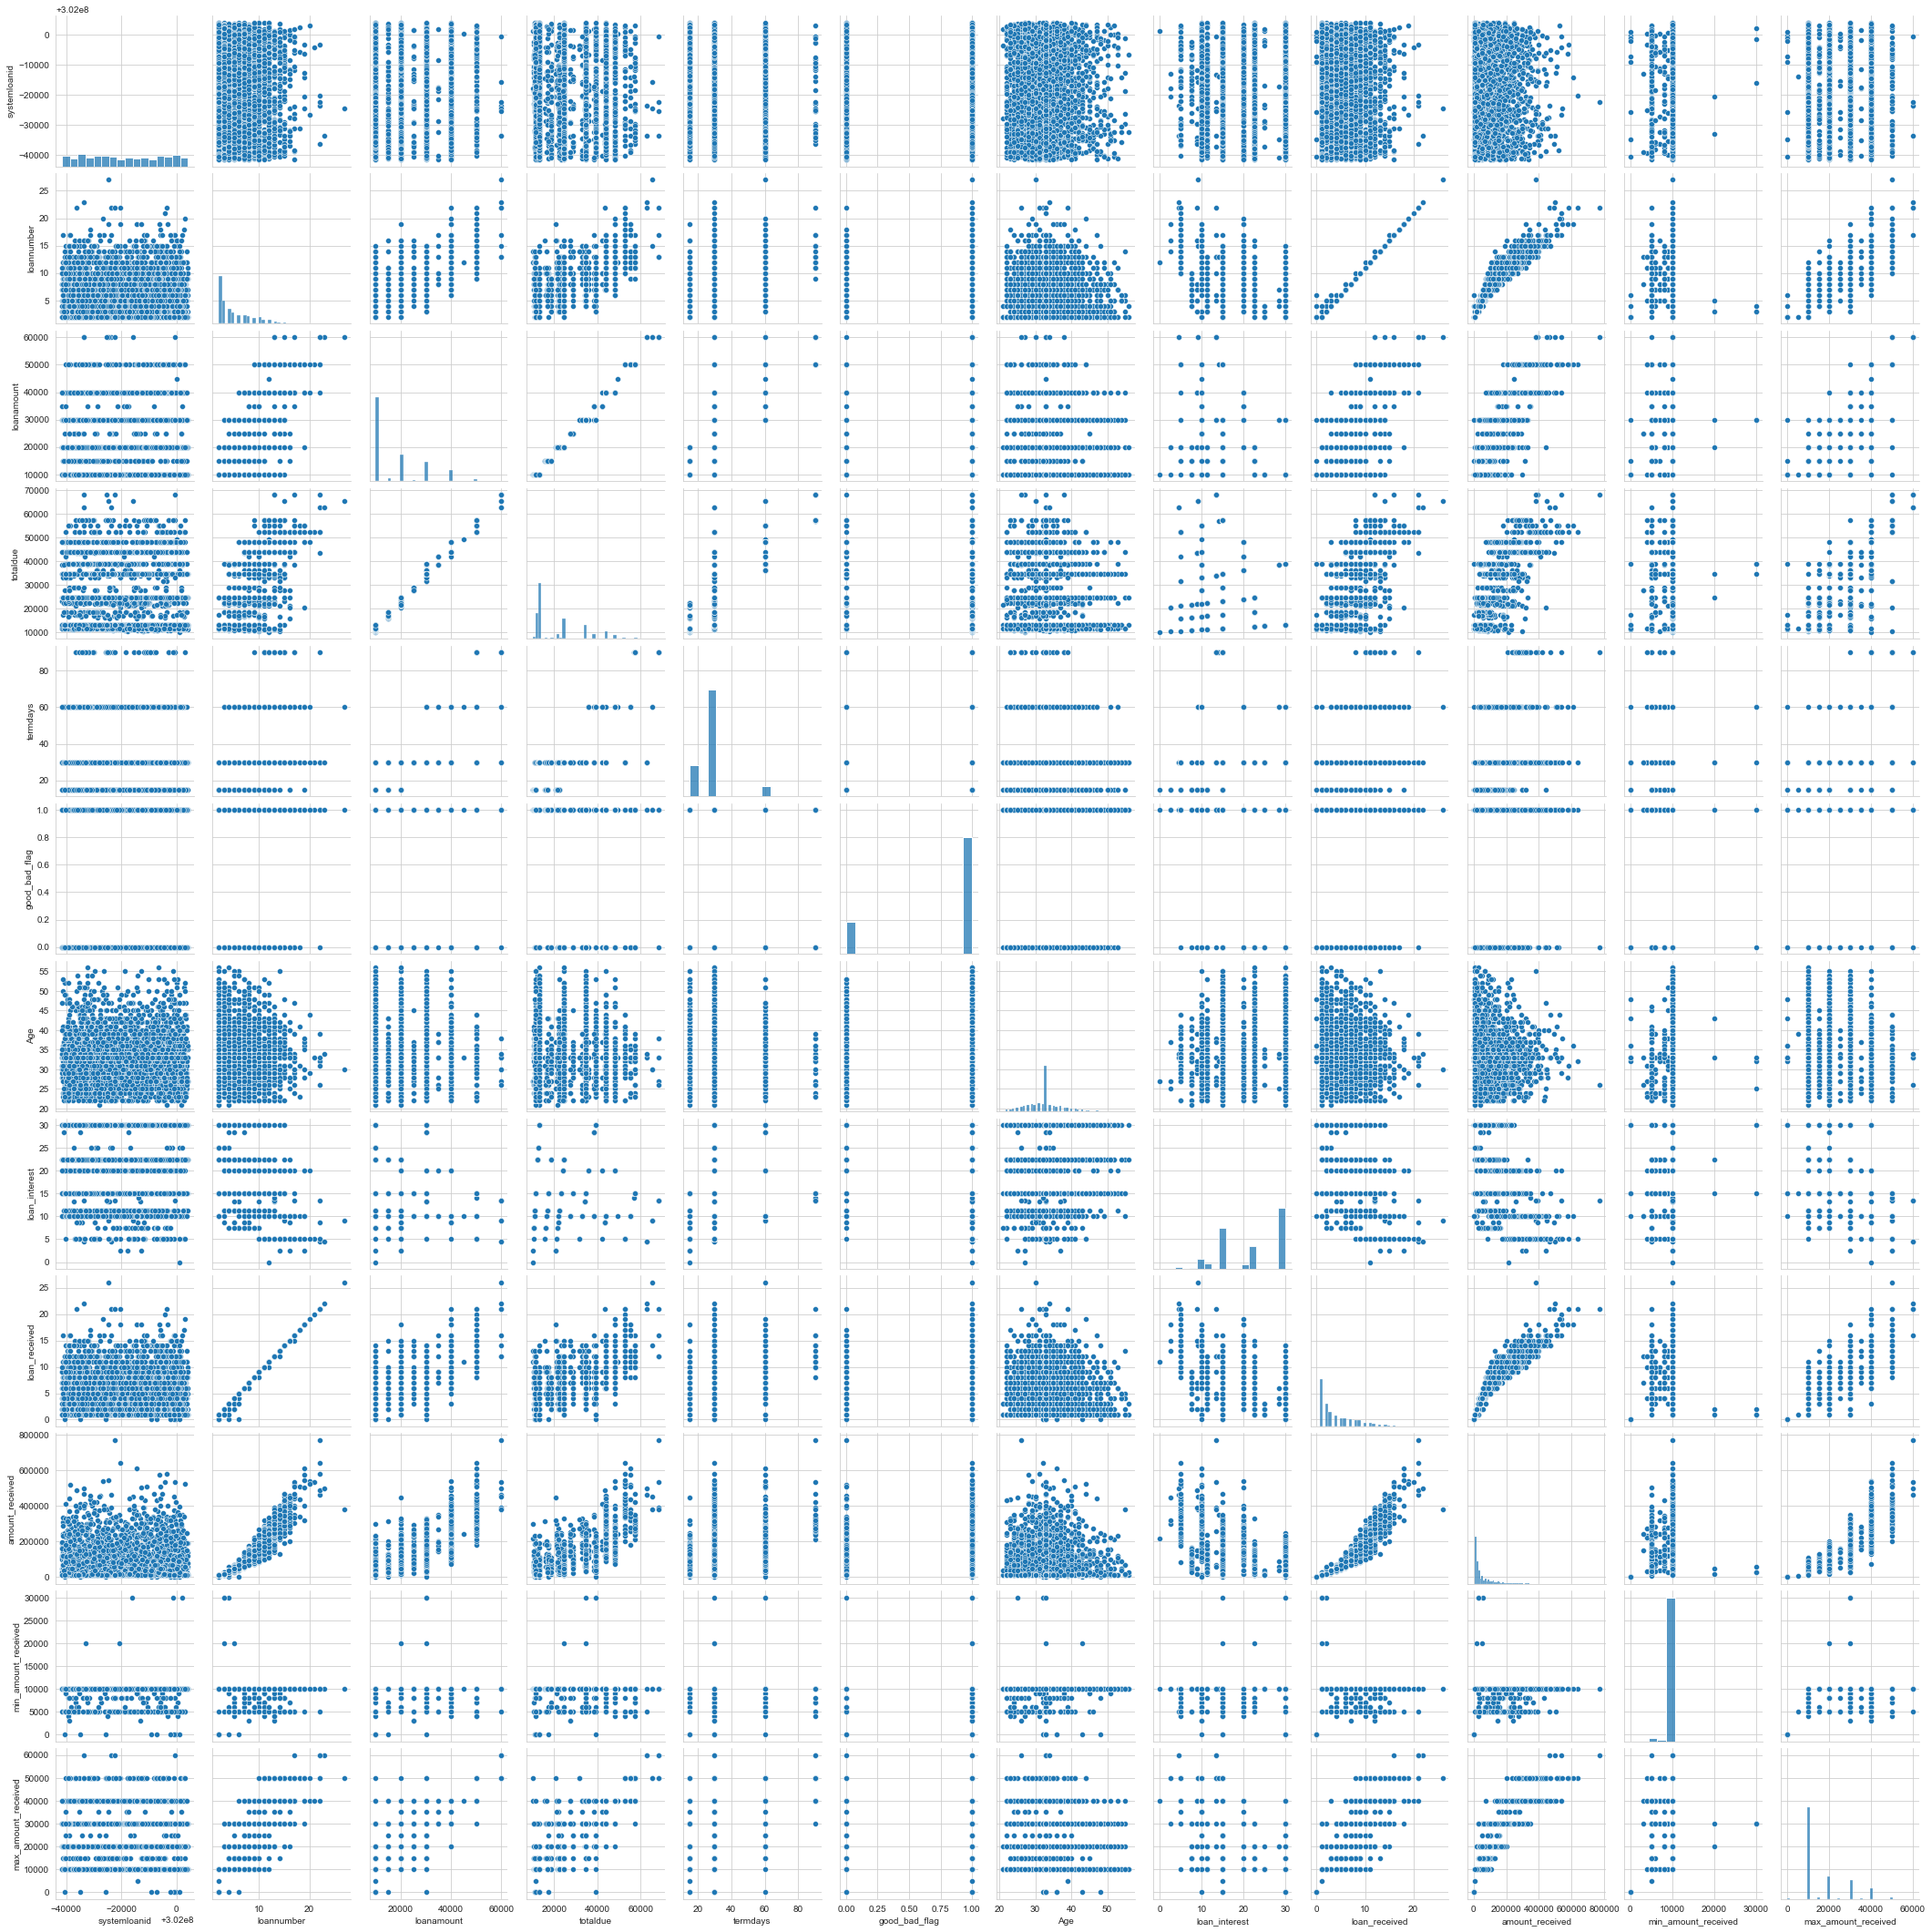

In [72]:
sns.pairplot(customer)

Check correlation

<AxesSubplot:>

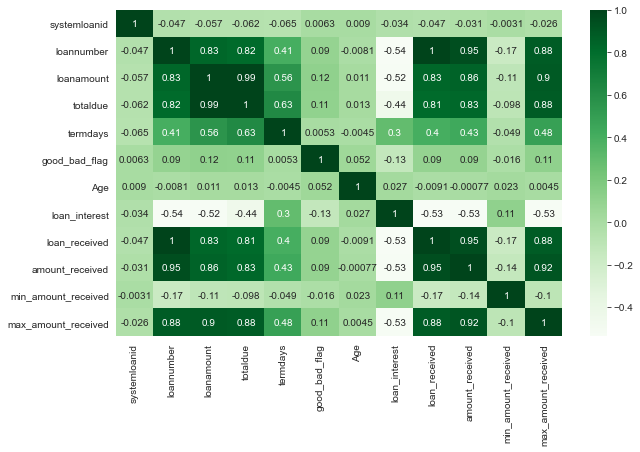

In [73]:
plt.figure(figsize=(10,6))
sns.heatmap(customer.corr(), annot=True, cmap='Greens')

In [74]:
customer.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag',
       'Age', 'employment_status_clients', 'level_of_education_clients',
       'loan_interest', 'loan_received', 'amount_received',
       'min_amount_received', 'max_amount_received'],
      dtype='object')

<AxesSubplot:xlabel='employment_status_clients', ylabel='count'>

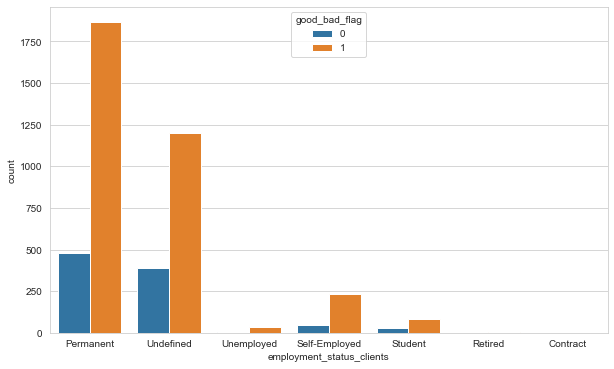

In [75]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(data = customer, x = 'employment_status_clients',hue= 'good_bad_flag')

<AxesSubplot:xlabel='level_of_education_clients', ylabel='count'>

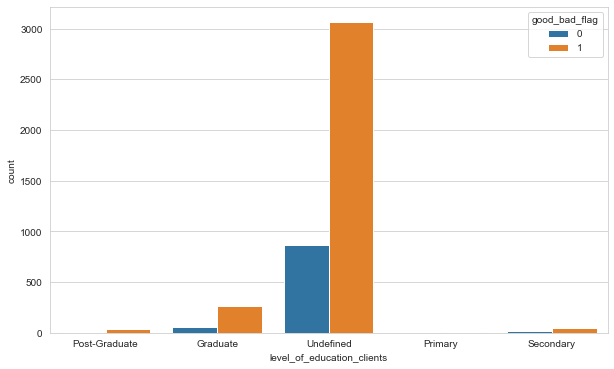

In [76]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(data = customer, x = 'level_of_education_clients',hue= 'good_bad_flag')

Majority of the customers (the one's that defaulted and didn't default) didn't define their level of education

<AxesSubplot:xlabel='loanamount', ylabel='count'>

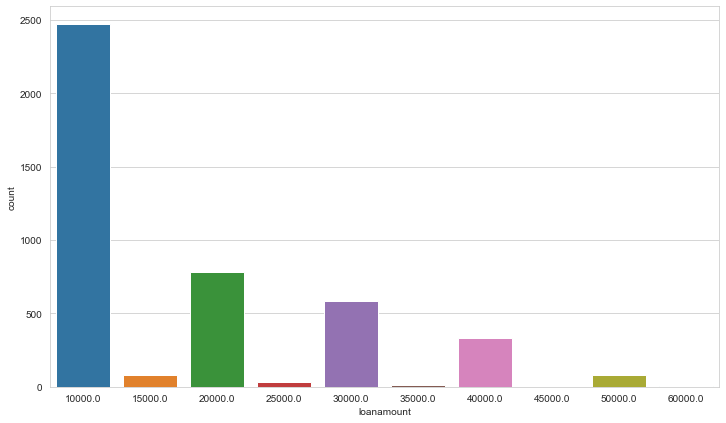

In [77]:
plt.figure(figsize=(12, 7)) 
sns.countplot(x='loanamount', data=customer)

Understanding the relationship between different data features

<AxesSubplot:xlabel='good_bad_flag', ylabel='Age'>

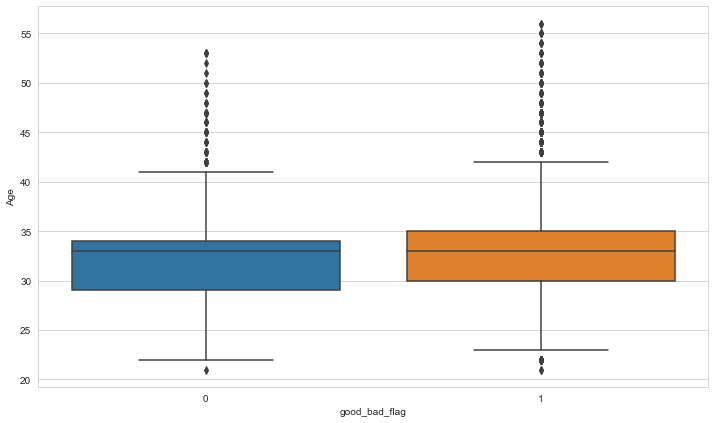

In [78]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='good_bad_flag',y='Age',data=customer)

<AxesSubplot:xlabel='level_of_education_clients', ylabel='Age'>

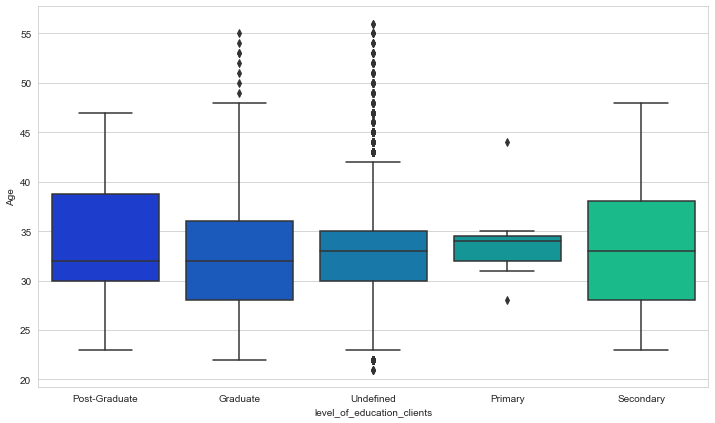

In [79]:
plt.figure(figsize=(12, 7))
sns.boxplot(x=customer.level_of_education_clients,y='Age',data=customer,palette='winter')

<AxesSubplot:xlabel='employment_status_clients', ylabel='Age'>

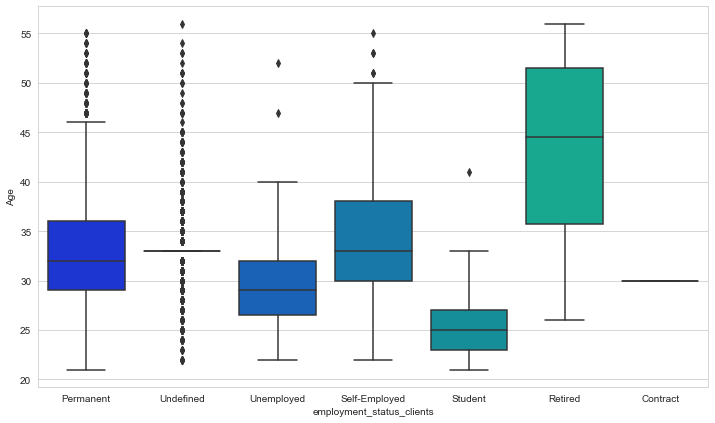

In [80]:
plt.figure(figsize=(12, 7))
sns.boxplot(x=customer.employment_status_clients,y='Age',data=customer,palette='winter')

<AxesSubplot:xlabel='employment_status_clients', ylabel='amount_received'>

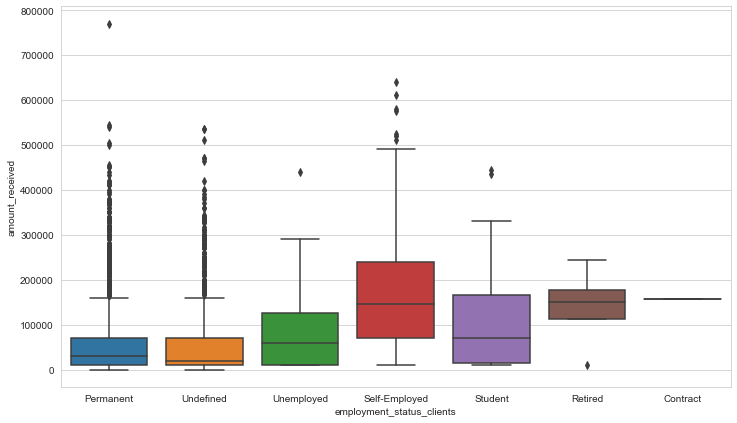

In [81]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='employment_status_clients', y='amount_received',data=customer)

<AxesSubplot:xlabel='employment_status_clients', ylabel='amount_received'>

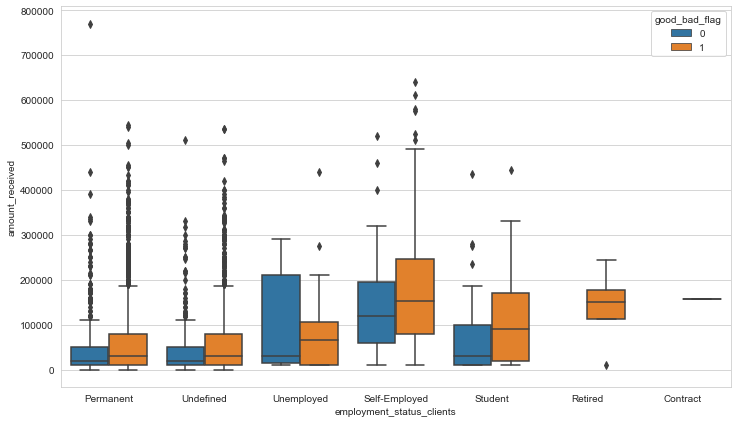

In [82]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='employment_status_clients', y='amount_received',data=customer, hue='good_bad_flag')

<AxesSubplot:xlabel='level_of_education_clients', ylabel='amount_received'>

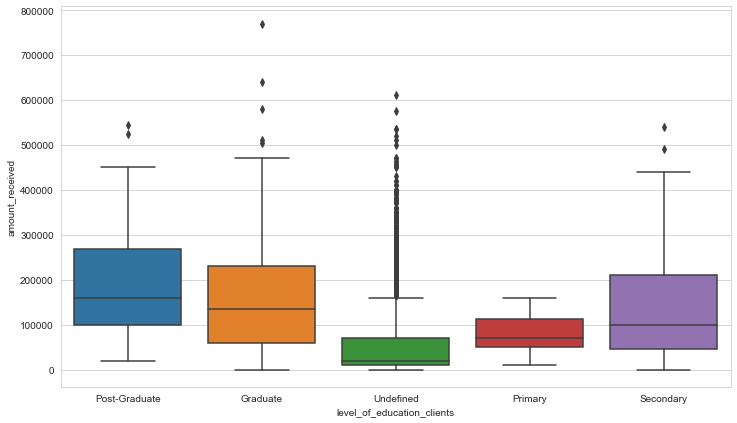

In [83]:
plt.figure(figsize=(12, 7))
sns.boxplot(x=customer.level_of_education_clients, y='amount_received',data=customer)

<Figure size 864x504 with 0 Axes>

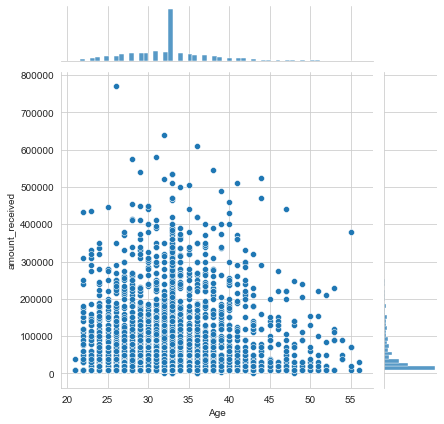

In [84]:
# check for distribution of age that received more loans
sns.set_style('whitegrid')
plt.figure(figsize=(12, 7))
sns.jointplot(x='Age', y='amount_received', data= customer)


In [85]:
customer

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,Age,employment_status_clients,level_of_education_clients,loan_interest,loan_received,amount_received,min_amount_received,max_amount_received
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,1,45.0,Permanent,Post-Graduate,15.00,11.0,200000.0,10000.0,30000.0
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,1,32.0,Permanent,Graduate,15.00,0.0,0.0,0.0,0.0
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,1,33.0,Permanent,Undefined,11.25,6.0,60000.0,10000.0,10000.0
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,1,40.0,Permanent,Undefined,15.00,2.0,20000.0,10000.0,10000.0
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,1,31.0,Permanent,Primary,10.00,8.0,150000.0,10000.0,30000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4371,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30 09:19:42,2017-07-30 08:18:30,10000.0,13000.0,30,0,33.0,Undefined,Undefined,30.00,1.0,10000.0,10000.0,10000.0
4372,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27 15:35:47,2017-07-27 14:35:40,10000.0,13000.0,30,0,28.0,Permanent,Undefined,30.00,1.0,10000.0,10000.0,10000.0
4373,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25 16:25:57,2017-07-25 15:24:47,10000.0,11500.0,15,0,28.0,Permanent,Undefined,15.00,2.0,20000.0,10000.0,10000.0
4374,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14 13:50:27,2017-07-14 12:50:21,10000.0,13000.0,30,0,27.0,Permanent,Undefined,30.00,1.0,10000.0,10000.0,10000.0


Categorical Encoding - Converting categorical variable in the dataset to integers

In [86]:
customer.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag',
       'Age', 'employment_status_clients', 'level_of_education_clients',
       'loan_interest', 'loan_received', 'amount_received',
       'min_amount_received', 'max_amount_received'],
      dtype='object')

In [87]:
# Check for the unique categorical variables  
customer.employment_status_clients.unique()

array(['Permanent', 'Undefined', 'Unemployed', 'Self-Employed', 'Student',
       'Retired', 'Contract'], dtype=object)

In [88]:
# Check for the unique categorical variables
customer.level_of_education_clients.unique()

array(['Post-Graduate', 'Graduate', 'Undefined', 'Primary', 'Secondary'],
      dtype=object)

Applying One-Hot Encoding since the number of categories in a categorical variable is more than 2

In [89]:
c_en = pd.get_dummies(customer[['employment_status_clients', 'level_of_education_clients']])
c_en

,employment_status_clients_Contract,employment_status_clients_Permanent,employment_status_clients_Retired,employment_status_clients_Self-Employed,employment_status_clients_Student,employment_status_clients_Undefined,employment_status_clients_Unemployed,level_of_education_clients_Graduate,level_of_education_clients_Post-Graduate,level_of_education_clients_Primary,level_of_education_clients_Secondary,level_of_education_clients_Undefined
0,0,1,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4371,0,0,0,0,0,1,0,0,0,0,0,1
4372,0,1,0,0,0,0,0,0,0,0,0,1
4373,0,1,0,0,0,0,0,0,0,0,0,1
4374,0,1,0,0,0,0,0,0,0,0,0,1


In [90]:
customer = customer.join(c_en)

In [91]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4376 entries, 0 to 4375
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   customerid                                4376 non-null   object        
 1   systemloanid                              4376 non-null   int64         
 2   loannumber                                4376 non-null   int64         
 3   approveddate                              4376 non-null   datetime64[ns]
 4   creationdate                              4376 non-null   datetime64[ns]
 5   loanamount                                4376 non-null   float64       
 6   totaldue                                  4376 non-null   float64       
 7   termdays                                  4376 non-null   int64         
 8   good_bad_flag                             4376 non-null   int64         
 9   Age                           

In [92]:
customer.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,Age,...,employment_status_clients_Retired,employment_status_clients_Self-Employed,employment_status_clients_Student,employment_status_clients_Undefined,employment_status_clients_Unemployed,level_of_education_clients_Graduate,level_of_education_clients_Post-Graduate,level_of_education_clients_Primary,level_of_education_clients_Secondary,level_of_education_clients_Undefined
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,1,45.0,...,0,0,0,0,0,0,1,0,0,0
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,1,32.0,...,0,0,0,0,0,1,0,0,0,0
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,1,33.0,...,0,0,0,0,0,0,0,0,0,1
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,1,40.0,...,0,0,0,0,0,0,0,0,0,1
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,1,31.0,...,0,0,0,0,0,0,0,1,0,0


In [93]:
# drop the categorical variables
customer.drop(['employment_status_clients', 'level_of_education_clients'], axis=1, inplace=True)

Remove redundant variables 

In [94]:
customer.drop(["customerid", "systemloanid", "approveddate","creationdate"], axis=1, inplace = True)

In [95]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4376 entries, 0 to 4375
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   loannumber                                4376 non-null   int64  
 1   loanamount                                4376 non-null   float64
 2   totaldue                                  4376 non-null   float64
 3   termdays                                  4376 non-null   int64  
 4   good_bad_flag                             4376 non-null   int64  
 5   Age                                       4376 non-null   float64
 6   loan_interest                             4376 non-null   float64
 7   loan_received                             4376 non-null   float64
 8   amount_received                           4376 non-null   float64
 9   min_amount_received                       4376 non-null   float64
 10  max_amount_received                 

 ## MODEL TRAINING AND EVALUATION

Since we are dealing with supervised binary classification problems. The goal is to maximize predictability, gain a deeper understanding of past customer profiles, and train the best machine learning models to minimize the risk of future loan defaults. We will make use of the following 7 classification Algorithms

1. Logistic Regression

2. K Nearest Neighbor

3. Decision Tree Model

4. Random Forest

5. Naive Bayes 

6. Support Vector Machine

7. Neural Network 

The models will be evaluated using the following performance evaluation metrics: 

1. Classification Report

2. Confusion Matrix

3. Accuracy

4. Precision

5. Recall

6. F1-score

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X = customer.drop('good_bad_flag', axis=1)
y = customer['good_bad_flag']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Feature Scaling

Using RobustScaler because dataset contains outliers and I want to reduce their influence.

In [99]:
from sklearn.preprocessing import RobustScaler
# calling instance
rbs = RobustScaler()
X_train = rbs.fit_transform(X_train)
X_test = rbs.transform(X_test)

In [100]:
# Using Minmax scaler
#from sklearn.preprocessing import MinMaxScaler
#mms = MinMaxScaler()
#X_train = mms.fit_transform(X_train)
#X_test = mms.transform(X_test)

In [101]:
# Using standard scaler 
#from sklearn.preprocessing import StandardScaler
#stds = StandardScaler()
#X_train = stds.fit_transform(X_train)
#X_test = stds.transform(X_test)

## Logistic Regression 

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score 

In [104]:
# calling instance 
logmod = LogisticRegression(max_iter=1000)

In [105]:
logmod.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [106]:
lr_pred = logmod.predict(X_test)

In [107]:
print(confusion_matrix(y_test,lr_pred))
print('\n')
print(classification_report(y_test,lr_pred))

[[   0  291]
 [   0 1022]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       291
           1       0.78      1.00      0.88      1022

    accuracy                           0.78      1313
   macro avg       0.39      0.50      0.44      1313
weighted avg       0.61      0.78      0.68      1313



/Users/ladi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ladi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ladi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the prediction we can see that there is a warning 'Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples', that is because the model of the default values predicted no 'good_bad_flag' were in 0 and from the confusion matrix above it predicted that everything belong to class 1. 

Basically the model needs to have it's parameters adjusted, I'll make use of grid search to search for the best parameters to use.

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
lr = LogisticRegression(max_iter = 1000, solver = 'lbfgs', class_weight = 'balanced' )
param = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
clf_lr = GridSearchCV(lr, param_grid= param, cv = 5).fit(X_train, y_train)

Inspecting the best parameters found by GridSearchCV using the best_params_ attribute, and the best estimator using the best_estimator_ attribute:

In [110]:
clf_lr.best_params_

{'C': 1}

In [111]:
clf_lr.best_estimator_

LogisticRegression(C=1, class_weight='balanced', max_iter=1000)

In [112]:
clf_lr_pred = clf_lr.predict(X_test)

Accuray Score: 58.0


F1-Score: 0.67


Precision: 0.86


Recall: 0.55


Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.67      0.41       291
           1       0.86      0.55      0.67      1022

    accuracy                           0.58      1313
   macro avg       0.58      0.61      0.54      1313
weighted avg       0.73      0.58      0.61      1313



Text(0.5, 1.0, 'Logistic Regression \n confusion matrix')

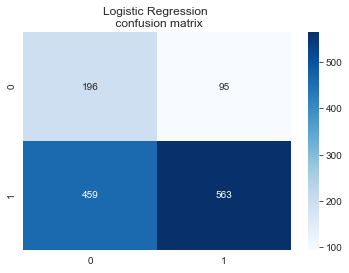

In [113]:
lr_acc = round(accuracy_score(y_test,clf_lr_pred)*100,0) 
lr_f1_score = round(f1_score(y_test, clf_lr_pred),2) 
lr_prc = round(precision_score(y_test, clf_lr_pred),2)
lr_recall = round(recall_score(y_test, clf_lr_pred),2)
print('Accuray Score:',lr_acc)
print('\n')
print('F1-Score:', lr_f1_score)
print('\n')
print('Precision:',lr_prc)
print('\n')
print('Recall:', lr_recall)
print('\n')
print('Classification Report:\n',classification_report(y_test,clf_lr_pred)) 

cm = confusion_matrix(y_test,clf_lr_pred) 
sns.heatmap(cm,annot=True,fmt="d", cmap='Blues')
plt.title("Logistic Regression \n confusion matrix")

## K Nearest Neighbors

In [114]:
from sklearn.neighbors import KNeighborsClassifier

In [115]:
knn = KNeighborsClassifier(n_neighbors=1)

In [116]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [117]:
knn_pred = knn.predict(X_test)

In [118]:
print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test, knn_pred))

WITH K=1


[[ 78 213]
 [208 814]]


              precision    recall  f1-score   support

           0       0.27      0.27      0.27       291
           1       0.79      0.80      0.79      1022

    accuracy                           0.68      1313
   macro avg       0.53      0.53      0.53      1313
weighted avg       0.68      0.68      0.68      1313



The Elbow method is one of the most common methods for determining the best value for k, we will make use the method.
Using the elbow method to select an optimal K Value: We will create a for loop that trains various KNN models with different k values to keep track of the error_rate for each of these models with a list

In [119]:
# created an empty list 
error_rate = []

for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    # appending the error rate i.e the average of predictions where predictions do not match y_test
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

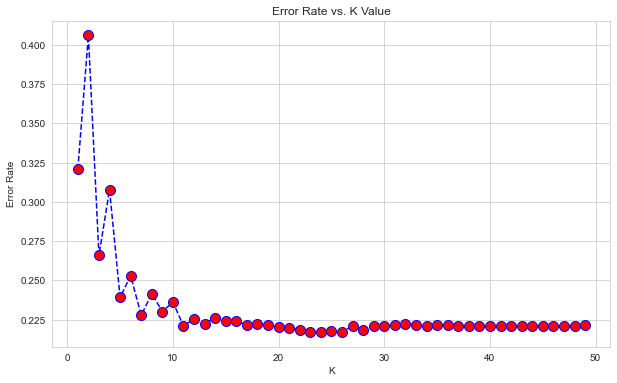

In [120]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Error rate is at the lowest when K=26

WITH K=26


Accuracy Score: 78.0


F1-Score: 0.88


Precision: 0.79


Recall: 0.99


Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.05      0.10       291
           1       0.79      0.99      0.88      1022

    accuracy                           0.78      1313
   macro avg       0.70      0.52      0.49      1313
weighted avg       0.75      0.78      0.70      1313





Text(0.5, 1.0, 'KNN \n confusion matrix')

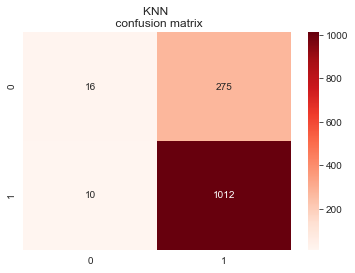

In [121]:
# NOW WITH K=26
knn_26 = KNeighborsClassifier(n_neighbors=26)

knn_26.fit(X_train,y_train)
knn_pred_26 = knn_26.predict(X_test)

print('WITH K=26')
print('\n') 

knn_acc = round(accuracy_score(y_test,knn_pred_26)*100,0)
knn_f1_score = round(f1_score(y_test,knn_pred_26),2)
knn_prc = round(precision_score(y_test,knn_pred_26),2)
knn_recall = round(recall_score(y_test,knn_pred_26),2)
print('Accuracy Score:',knn_acc)
print('\n') 

print('F1-Score:', knn_f1_score)
print('\n')

print('Precision:',knn_prc)
print('\n')

print('Recall:', knn_recall)
print('\n')

print('Classification Report:\n',classification_report(y_test,knn_pred_26))
print('\n')

cm = confusion_matrix(y_test,knn_pred_26) 
sns.heatmap(cm,annot=True,fmt="d", cmap='Reds')
plt.title("KNN \n confusion matrix")


## Decision Tree Model

In [122]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
Dct = DecisionTreeClassifier()

In [124]:
Dct.fit(X_train,y_train)

DecisionTreeClassifier()

In [125]:
Dct_pred = Dct.predict(X_test)

Accuracy Score: 68.0


F1-Score: 0.8


Precision: 0.78


Recall: 0.82


              precision    recall  f1-score   support

           0       0.24      0.20      0.22       291
           1       0.78      0.82      0.80      1022

    accuracy                           0.68      1313
   macro avg       0.51      0.51      0.51      1313
weighted avg       0.66      0.68      0.67      1313



Text(0.5, 1.0, 'Decision Tree Model \n confusion matrix')

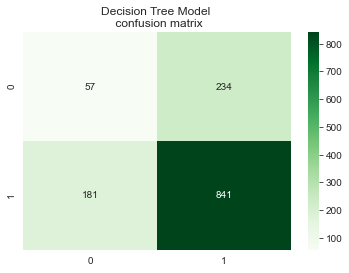

In [126]:
dct_acc = round(accuracy_score(y_test,Dct_pred)*100,0)
dct_f1_score = round(f1_score(y_test,Dct_pred),2)
dct_prc = round(precision_score(y_test,Dct_pred),2)
dct_recall = round(recall_score(y_test,Dct_pred),2)
print('Accuracy Score:',dct_acc)
print('\n')
print('F1-Score:', dct_f1_score)
print('\n')
print('Precision:',dct_prc)
print('\n')
print('Recall:', dct_recall)
print('\n')
print(classification_report(y_test,Dct_pred))

cm = confusion_matrix(y_test,Dct_pred) 
sns.heatmap(cm,annot=True,fmt="d", cmap='Greens')
plt.title("Decision Tree Model \n confusion matrix")


## Random Forest Classifier Model

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
rcf = RandomForestClassifier()

In [129]:
rcf.fit(X_train,y_train)

RandomForestClassifier()

In [130]:
rcf_pred = rcf.predict(X_test)

Accuracy Score: 74.0


F1-Score: 0.85


Precision: 0.79


Recall: 0.92


Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.12      0.17       291
           1       0.79      0.92      0.85      1022

    accuracy                           0.74      1313
   macro avg       0.55      0.52      0.51      1313
weighted avg       0.68      0.74      0.70      1313



Text(0.5, 1.0, 'Random Forest Classifier \n confusion matrix')

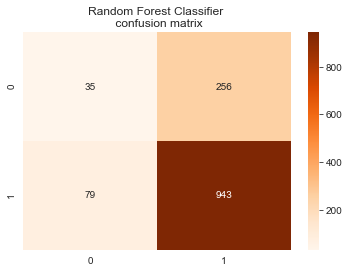

In [131]:
rcf_acc = round(accuracy_score(y_test,rcf_pred)*100,0)
rcf_f1_score = round(f1_score(y_test,rcf_pred),2)
rcf_prc = round(precision_score(y_test,rcf_pred),2)
rcf_recall = round(recall_score(y_test,rcf_pred),2)
print('Accuracy Score:',rcf_acc)
print('\n')
print('F1-Score:', rcf_f1_score)
print('\n')
print('Precision:',rcf_prc)
print('\n')
print('Recall:', rcf_recall)
print('\n')
print('Classification Report:\n',classification_report(y_test,rcf_pred)) 

cm = confusion_matrix(y_test,rcf_pred) 
sns.heatmap(cm,annot=True,fmt="d", cmap='Oranges')
plt.title("Random Forest Classifier \n confusion matrix")

## Gaussian Naive Bayes

In [132]:
from sklearn.naive_bayes import GaussianNB

In [133]:
gnb = GaussianNB()

In [134]:
gnb.fit(X_train,y_train)

GaussianNB()

In [135]:
gnb_pred = gnb.predict(X_test)

Accuracy Score: 54.0


F1-Score: 0.62


Precision: 0.86


Recall: 0.49


Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.71      0.41       291
           1       0.86      0.49      0.62      1022

    accuracy                           0.54      1313
   macro avg       0.57      0.60      0.51      1313
weighted avg       0.73      0.54      0.58      1313



Text(0.5, 1.0, 'Gaussian Naive Bayes \n confusion matrix')

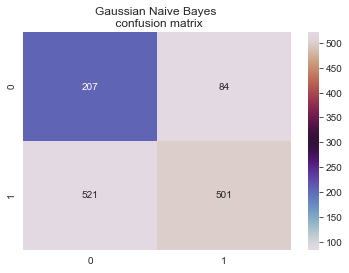

In [136]:
gnb_acc = round(accuracy_score(y_test,gnb_pred)*100,0)
gnb_f1_score = round(f1_score(y_test,gnb_pred),2)
gnb_prc = round(precision_score(y_test,gnb_pred),2)
gnb_recall = round(recall_score(y_test,gnb_pred),2)
print('Accuracy Score:',gnb_acc)
print('\n')
print('F1-Score:', gnb_f1_score)
print('\n')
print('Precision:', gnb_prc)
print('\n')
print('Recall:', gnb_recall)
print('\n')
print('Classification Report:\n',classification_report(y_test,gnb_pred)) 

cm = confusion_matrix(y_test,gnb_pred) 
sns.heatmap(cm,annot=True,fmt="d", cmap='twilight')
plt.title("Gaussian Naive Bayes \n confusion matrix")

## Support Vector Machine Model

In [137]:
from sklearn.svm import SVC

In [138]:
svc = SVC()

In [139]:
svc.fit(X_train,y_train)

SVC()

In [140]:
svc_pred = svc.predict(X_test)

In [141]:
print(confusion_matrix(y_test,svc_pred))
print('\n')
print(classification_report(y_test,svc_pred))

[[   0  291]
 [   0 1022]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       291
           1       0.78      1.00      0.88      1022

    accuracy                           0.78      1313
   macro avg       0.39      0.50      0.44      1313
weighted avg       0.61      0.78      0.68      1313



/Users/ladi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ladi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ladi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Similar error as the logistic regression above. From the prediction we can see that there is a warning 'Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples', that is because the model of the default values predicted no 'good_bad_flag' were in 0 and from the confusion matrix above it predicted that everything belong to class 1. 

Basically the model needs to have it's parameters adjusted, I'll make use of grid search to search for the best parameters to use.

In [142]:
svc_1 = SVC(class_weight='balanced',probability=True, verbose=True)
parameters = {'C':[0.1, 1, 10]}
clf_svc = GridSearchCV(svc_1, parameters, cv = 5).fit(X_train, y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

Inspecting the best parameters found by GridSearchCV using the best_params_ attribute, and the best estimator using the best_estimator_ attribute:

In [143]:
clf_svc.best_params_

{'C': 0.1}

In [144]:
clf_svc.best_estimator_

SVC(C=0.1, class_weight='balanced', probability=True, verbose=True)

In [145]:
clf_svc_pred = clf_svc.predict(X_test)

Accuracy Score: 25.0


F1-Score: 0.09


Precision: 0.85


Recall: 0.05


Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.97      0.37       291
           1       0.85      0.05      0.09      1022

    accuracy                           0.25      1313
   macro avg       0.54      0.51      0.23      1313
weighted avg       0.72      0.25      0.15      1313



Text(0.5, 1.0, 'Support Vector Machine \n confusion matrix')

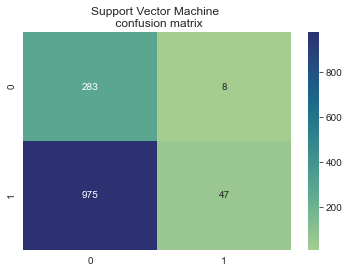

In [146]:
svc_acc = round(accuracy_score(y_test,clf_svc_pred)*100,0)
svc_f1_score = round(f1_score(y_test,clf_svc_pred),2)
svc_prc = round(precision_score(y_test,clf_svc_pred),2)
svc_recall = round(recall_score(y_test,clf_svc_pred),2)
print('Accuracy Score:',svc_acc)
print('\n')
print('F1-Score:', svc_f1_score)
print('\n')
print('Precision:',svc_prc)
print('\n')
print('Recall:', svc_recall)
print('\n')
print('Classification Report:\n',classification_report(y_test,clf_svc_pred))

cm = confusion_matrix(y_test,clf_svc_pred) 
sns.heatmap(cm,annot=True,fmt="d", cmap='crest')
plt.title("Support Vector Machine \n confusion matrix")

## Neural Network

In [159]:
from sklearn.neural_network import MLPClassifier

In [160]:
nn = MLPClassifier(max_iter=1000)
nn.fit(X_train,y_train)
nn_pred = nn.predict(X_test)

Accuracy Score: 77.0


F1-Score: 0.87


Precision: 0.78


Recall: 0.99


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       291
           1       0.78      0.99      0.87      1022

    accuracy                           0.77      1313
   macro avg       0.39      0.50      0.44      1313
weighted avg       0.61      0.77      0.68      1313



Text(0.5, 1.0, 'Neural Network \n confusion matrix')

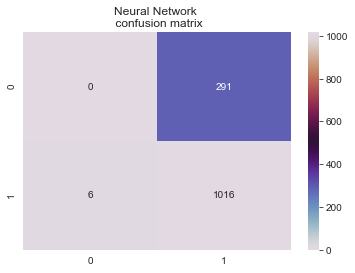

In [161]:
nn_acc = round(accuracy_score(y_test,nn_pred)*100,0)
nn_f1_score = round(f1_score(y_test,nn_pred),2)
nn_prc = round(precision_score(y_test,nn_pred),2)
nn_recall = round(recall_score(y_test,nn_pred),2)
print('Accuracy Score:', nn_acc)
print('\n')
print('F1-Score:', nn_f1_score)
print('\n')
print('Precision:', nn_prc)
print('\n')
print('Recall:', nn_recall)
print('\n')
print('Classification Report:\n',classification_report(y_test,nn_pred)) 

cm = confusion_matrix(y_test,nn_pred) 
sns.heatmap(cm,annot=True,fmt="d", cmap='twilight')
plt.title("Neural Network \n confusion matrix")

## Model Selection

In [162]:
model_predicted = ['Logistic Regression (LR)','K Nearest Neighbors (KNN)','Decision Tree Model (DTM)',
                   'Random Forest (RF)','Gaussian Naive Bayes (GNN)' ,'Support Vector Machine (SVM)', 'Neural Network (NN)']
acc_list = [lr_acc, knn_acc, dct_acc, rcf_acc, gnb_acc, svc_acc, nn_acc]
f1_list = [lr_f1_score, knn_f1_score, dct_f1_score, rcf_f1_score, gnb_f1_score, svc_f1_score, nn_f1_score] 
prc_list = [lr_prc, knn_prc, dct_prc, rcf_prc, gnb_prc, svc_prc, nn_prc]
recall_lst = [lr_recall, knn_recall, dct_recall, rcf_recall, gnb_recall, svc_recall, nn_recall]

In [163]:
result = pd.DataFrame({'Model': model_predicted,'Accuracy %': acc_list,'F1 - Score': f1_list,
                      'Precision': prc_list,'Recall': recall_lst})
result.set_index('Model',inplace=True)
result

,Accuracy %,F1 - Score,Precision,Recall
Model,,,,
Logistic Regression (LR),58.0,0.67,0.86,0.55
K Nearest Neighbors (KNN),78.0,0.88,0.79,0.99
Decision Tree Model (DTM),68.0,0.80,0.78,0.82
Random Forest (RF),74.0,0.85,0.79,0.92
Gaussian Naive Bayes (GNN),54.0,0.62,0.86,0.49
Support Vector Machine (SVM),25.0,0.09,0.85,0.05
Neural Network (NN),77.0,0.87,0.78,0.99


From the comparisons above the models that that had the best performance are **KNN, Neural Network and Random Forest**. For our model selection, **KNN** performed best with **Accuracy = 78%**, **Recall = 0.99**. Recall gives a measure of how accurately the model is able to identify the relevant data. One of the aim of this project is to be able to classify customers that are non-defaulters from defaulters. **Precision = 0.79** indicates that each time our model predicts a non-defaulter it is 79% correct, which gives us a measure of relevant data points. Thus reducing the likelihood of the Super Lender denying loans to potential non-defaulters and thereby losing customers because they were labelled as defaulters. Also, **F1-Score = 0.88** which indicates a good score for both Recall and Precision